## Please follow the below structure while attempting the hackathon, make sure to submit the jupyter file as well for every submission you are making.

## Please answer the descriptive question in the Jupyter Notebook Itself. This is going to carry more weightage in the final evaluation.

## Importing Necessary Libraries

In [1]:
#pip install --upgrade pingouin

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg

import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix
#from category_encoders import BinaryEncoder
from IPython.display import Image
#import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
seed = 42

from warnings import filterwarnings
filterwarnings("ignore")

## 1 Data Cleaning

In this section you can do all the Data cleaning part of all necessary imputations and treatments























In [3]:
db = pd.read_csv("Train_Set_TVS.csv");
db.head(5)

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,...,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,...,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,...,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,...,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [4]:
db.drop(columns=['ID','density_Ind','Day_Process','Contact_age'],inplace=True);

In [5]:
db.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Compensation,126198.0,745051.897,470276.230,152728.0,517706.000,665996.00,879489.000,7.037702e+07
Loan_amt,132440.0,414801.134,274678.779,34275.0,204529.950,349542.50,558205.000,2.872142e+06
Annuity_amt,127829.0,10845.286,2061.529,5852.1,9348.370,10773.82,12165.390,4.130100e+04
Home_Appliances,121476.0,3.221,1.242,1.0,2.000,4.00,4.000,1.900000e+01
Experience,110595.0,6.581,6.357,0.0,2.100,4.60,9.000,4.810000e+01
Dependents,132440.0,2.155,0.909,1.0,2.000,2.00,3.000,9.000000e+00
Company_Rating,120709.0,2.031,0.504,1.0,2.000,2.00,2.000,3.000000e+00
Age,132440.0,43.933,11.963,21.0,34.000,43.00,54.000,6.900000e+01
hour_Process,132440.0,12.061,3.567,0.0,10.000,12.00,15.000,2.500000e+01
c1_rated,114927.0,0.506,0.269,0.0,0.268,0.50,0.769,9.470000e-01


In [6]:
db.describe(include=[object]).T

,count,unique,top,freq
Vehicle_Status,123336,2,N,81370
Job_Type,122192,3,IT,66982
Default_hist,132440,2,ndf,119170
Prop_List,130475,3,One,91559
Region_Type,132440,3,Metro,107548
Credit_Inq,129750,4,1,67072
Education_det,132440,3,Grad,93858
Marital_Stat,132440,4,Married,97609
Gen,132440,2,M,87063
Credit_Lnks,132440,3,1_to_3,117604


The dataset has 132440 observations and 32 variables including the target, divided into 15 numeric and 17 categoric features.
\
Missing value present in Compensation, Annuity_amt, density_Ind, Home_Appliances, Experience, Company_Rating, c1_rated, c2_rated, Contact_age, Vehicle_Status, Job_Type,Prop_List,Credit_Inq, Income_Alt

From the difference between the mean and the median, and also the distance of maximum values of the variables it seems there are some outliers.

## 2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

























,absolute,percent
0.0,97436,73.57
1.0,35004,26.43


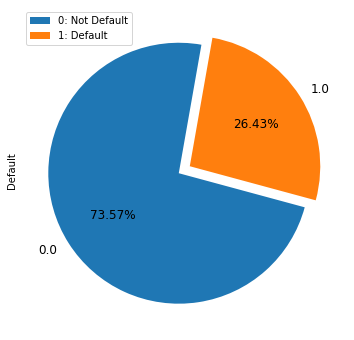

In [7]:
# Checking data balance/proportion
loan = db.Default.value_counts().to_frame().rename(columns={"Default":"absolute"})
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))
display(loan)

# pie chart
db.Default.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: Not Default","1: Default"]);

target has 26.43% of default results (value 1) against 73.57% of loans that ended up by been paid/ non-default (value 0).

In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Compensation        126198 non-null  float64
 1   Vehicle_Status      123336 non-null  object 
 2   Loan_amt            132440 non-null  float64
 3   Annuity_amt         127829 non-null  float64
 4   Job_Type            122192 non-null  object 
 5   Default_hist        132440 non-null  object 
 6   Prop_List           130475 non-null  object 
 7   Home_Appliances     121476 non-null  float64
 8   Region_Type         132440 non-null  object 
 9   Credit_Inq          129750 non-null  object 
 10  Education_det       132440 non-null  object 
 11  Marital_Stat        132440 non-null  object 
 12  Gen                 132440 non-null  object 
 13  Credit_Lnks         132440 non-null  object 
 14  Experience          110595 non-null  float64
 15  Income_Alt          124758 non-nul

In [9]:
db.dtypes.value_counts()

object     16
float64    13
dtype: int64

In [10]:
nulval = db.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
Compensation,6242,5.29
Vehicle_Status,9104,7.72
Loan_amt,0,0.00
Annuity_amt,4611,3.91
Job_Type,10248,8.69
Default_hist,0,0.00
Prop_List,1965,1.67
Home_Appliances,10964,9.30
Region_Type,0,0.00
Credit_Inq,2690,2.28


In [11]:
data_ca = db.select_dtypes(exclude=["int64","float64"]).copy()
data_nu = db.select_dtypes(exclude=["object","category"]).copy()

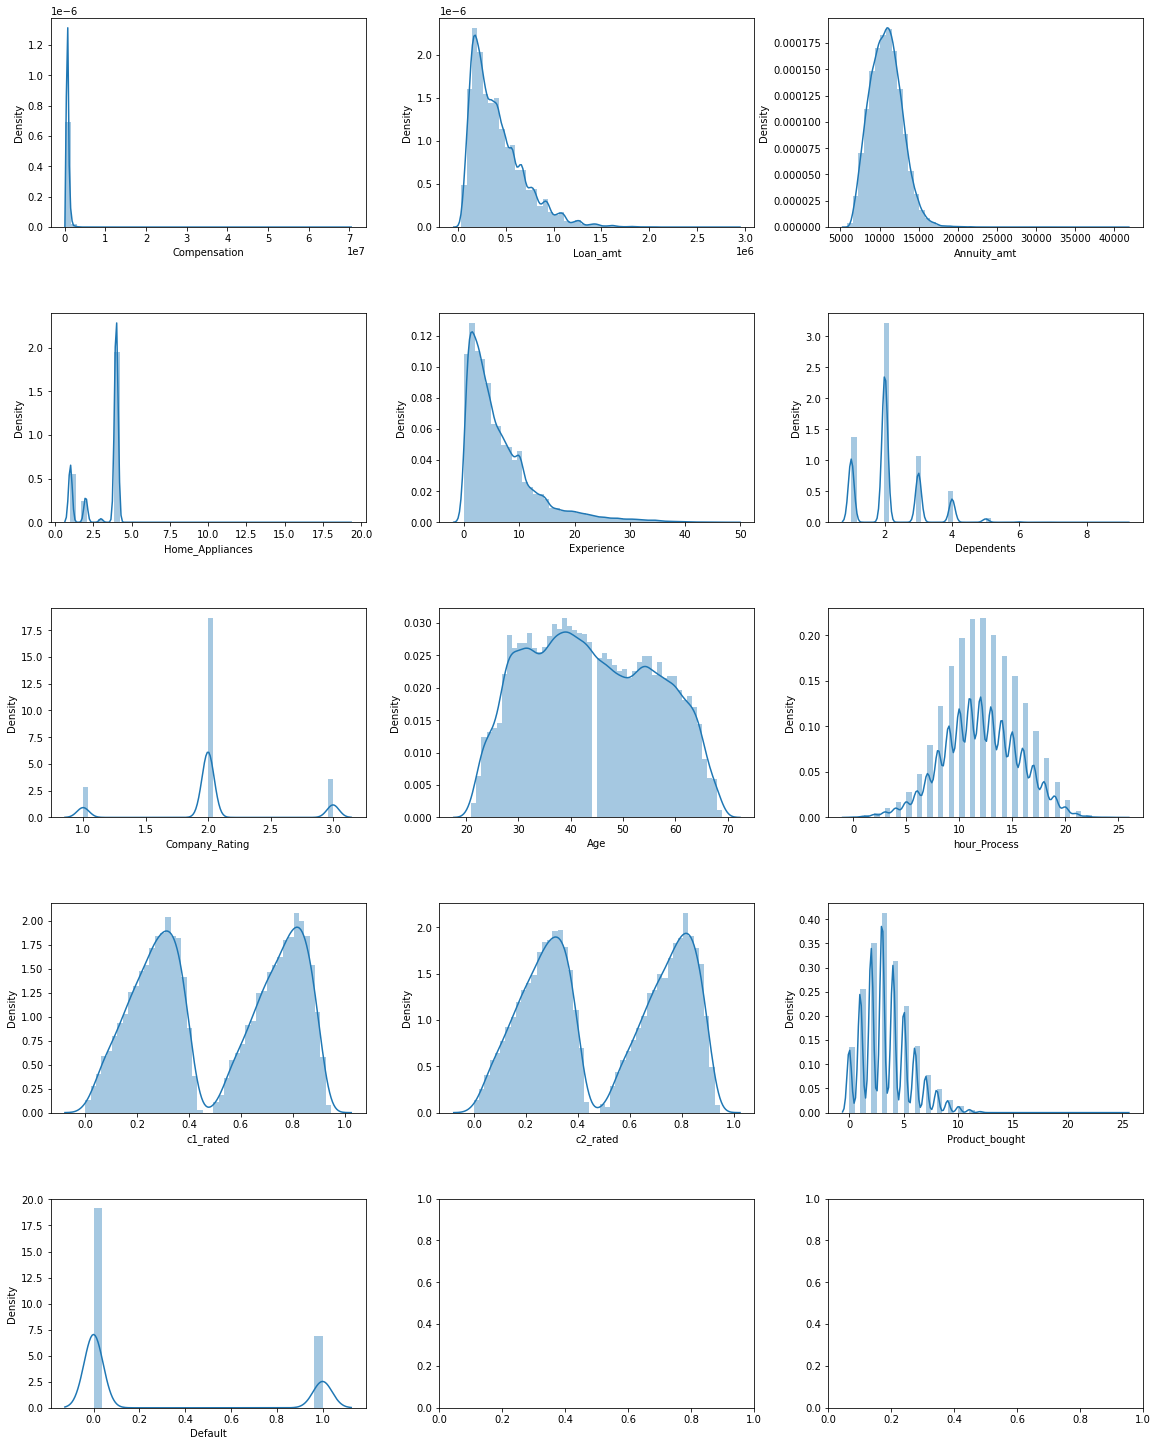

In [12]:
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(16, 20))
index = 0
axs = axs.flatten()
for k,v in data_nu.items():
    sns.distplot(db[data_nu.columns[index]], ax=axs[index])
    index += 1
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

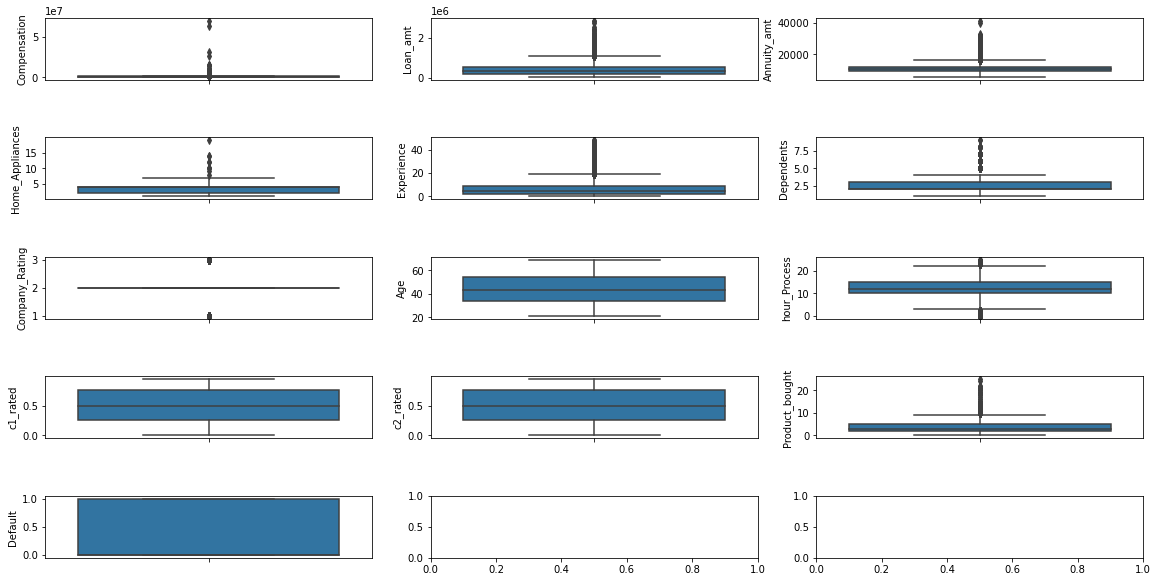

In [13]:
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(16, 8))
index = 0
axs = axs.flatten()
for k,v in data_nu.items():
    sns.boxplot(y=k, data=data_nu, ax=axs[index], orient="h")
    index += 1
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [14]:
df_num = db.select_dtypes(include = 'float64')
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()/df_num.shape[0]*100).round(2),columns=['Outliers %'])

,Outliers %
Compensation,4.01
Loan_amt,2.72
Annuity_amt,0.77
Home_Appliances,0.01
Experience,4.48
Dependents,1.33
Company_Rating,23.21
Age,0.00
hour_Process,0.46
c1_rated,0.00


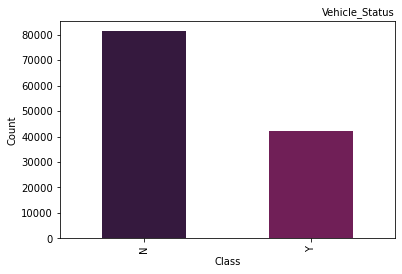

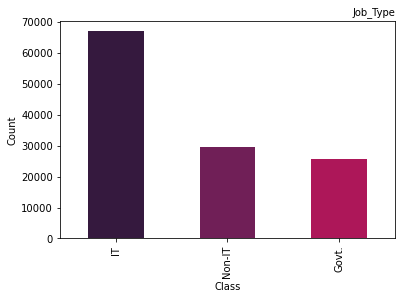

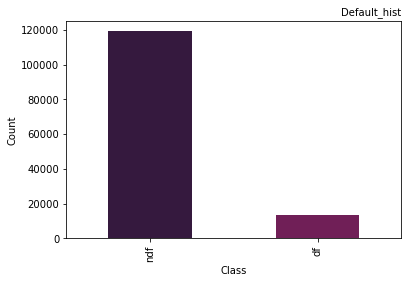

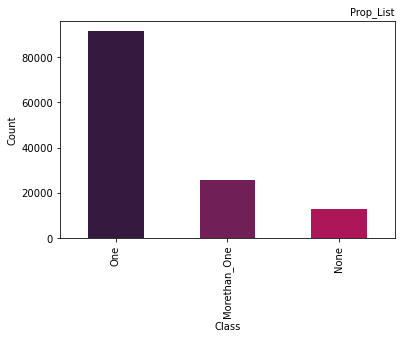

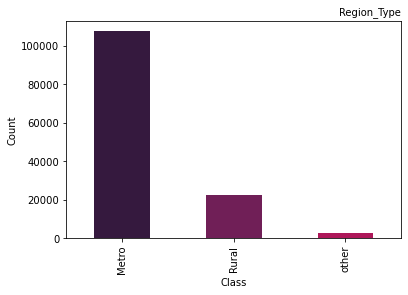

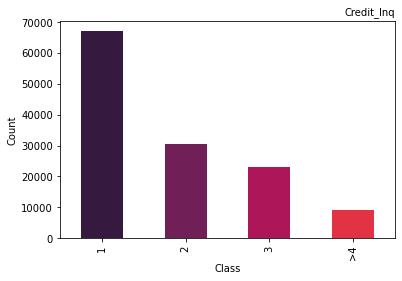

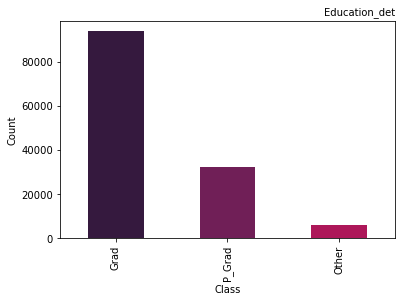

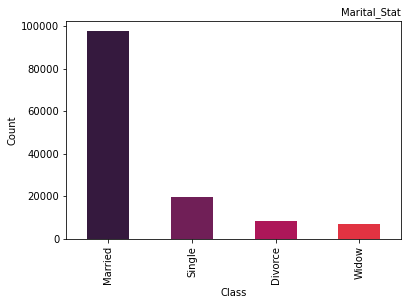

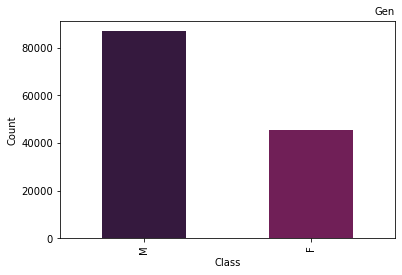

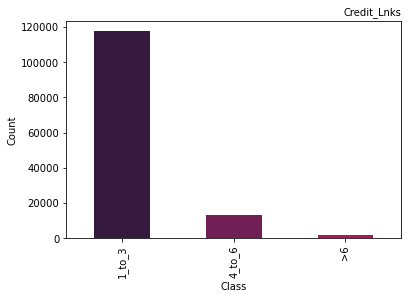

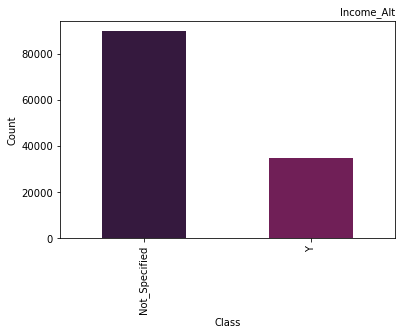

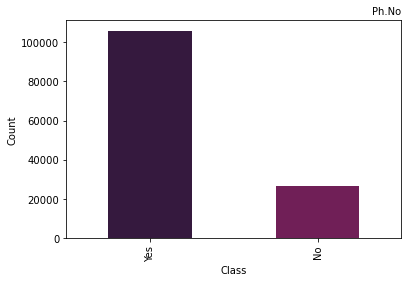

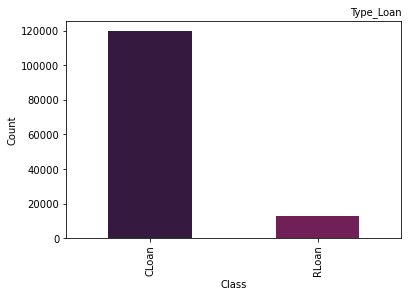

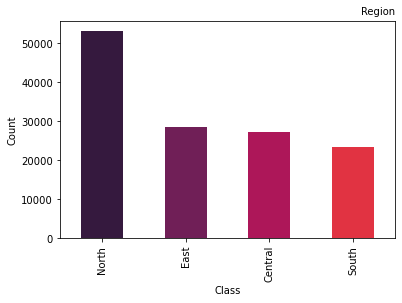

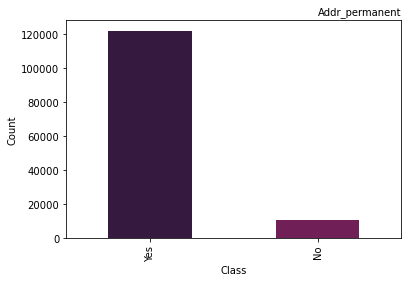

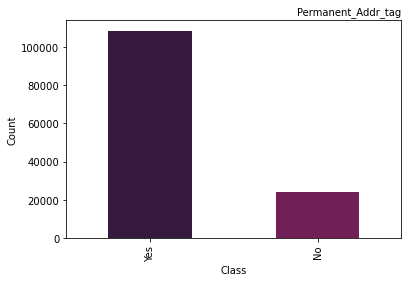

In [15]:
for col in db.select_dtypes(include=["object"]).columns:
    db[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))

    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    plt.show()

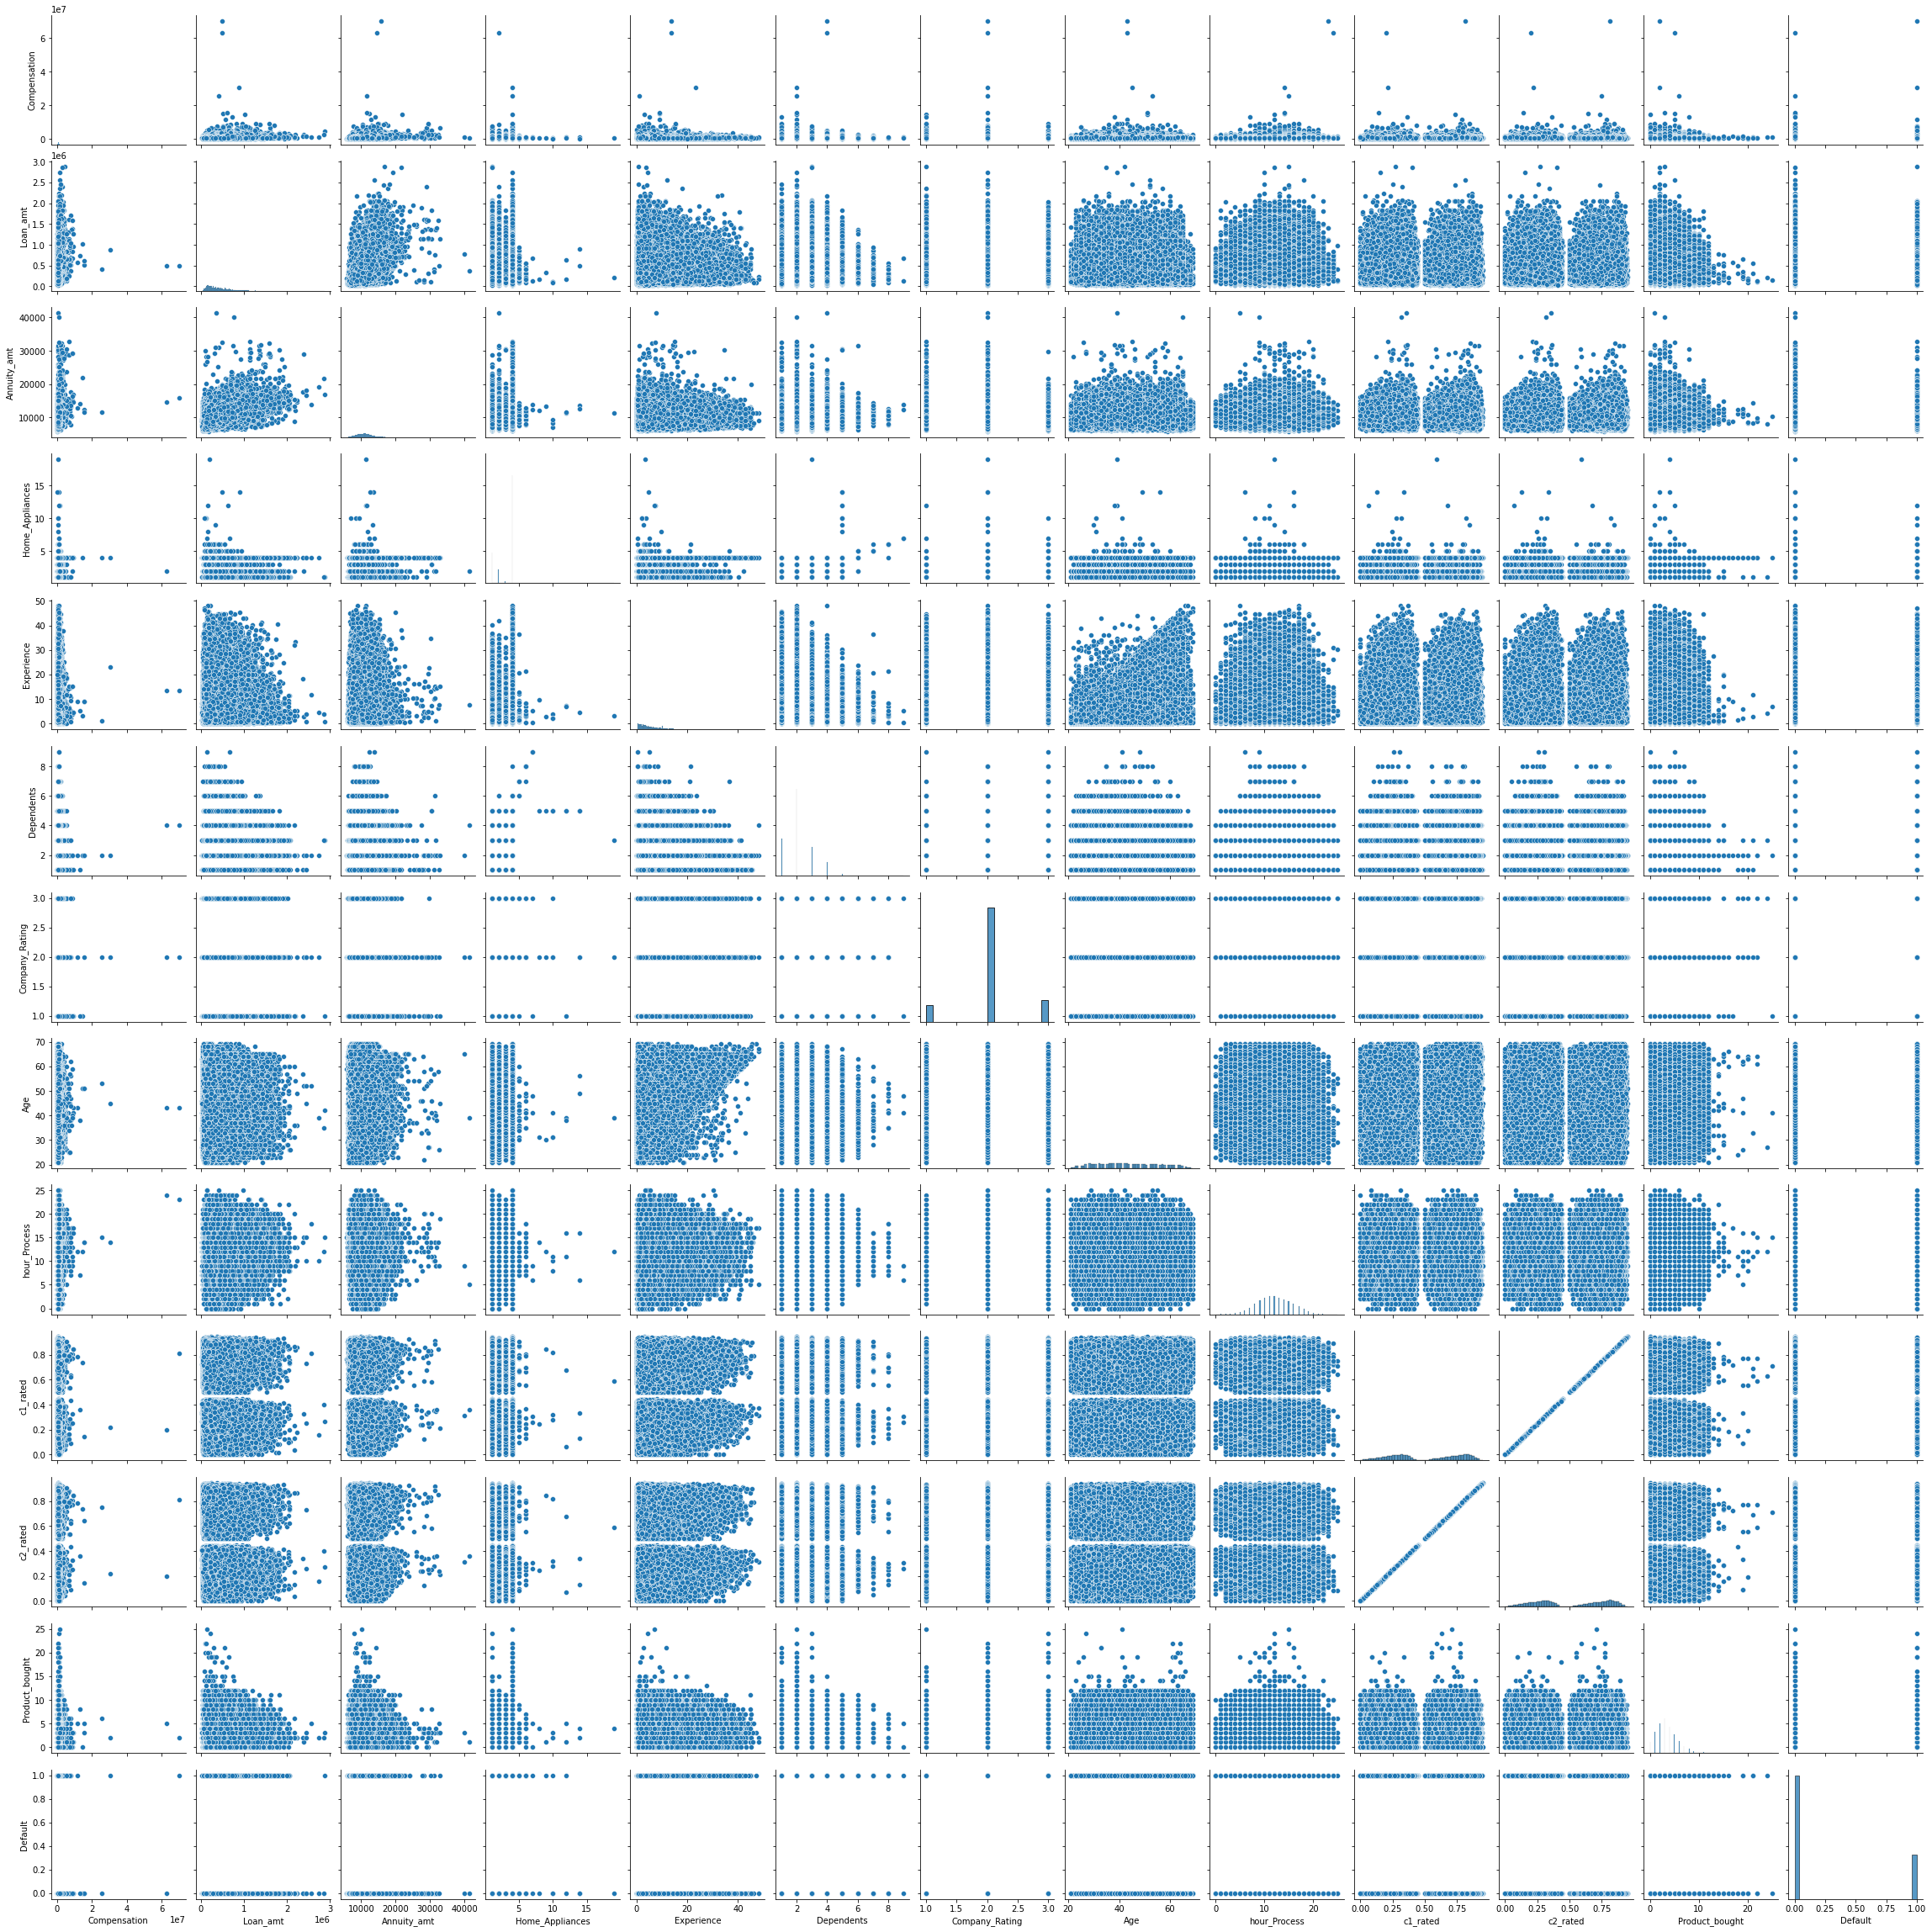

In [16]:
sns.pairplot(db)

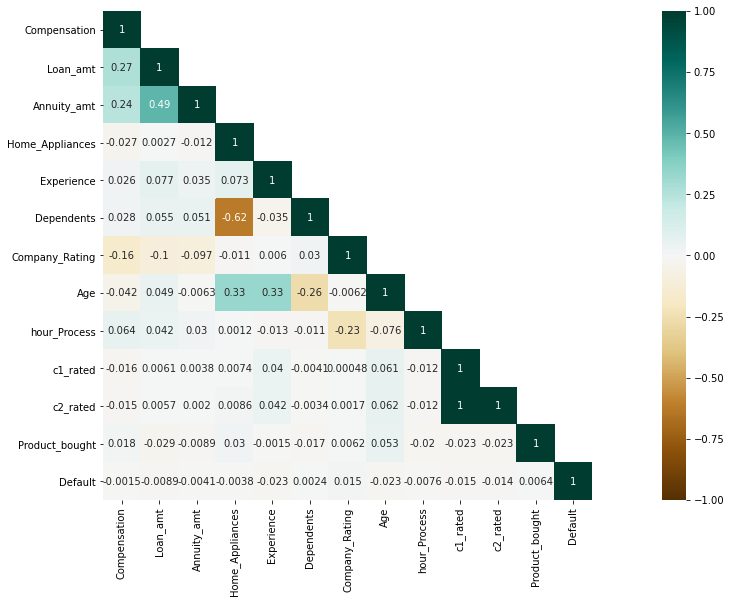

In [17]:
mask = np.triu(db.corr(), 1)
plt.figure(figsize=(25, 9))
sns.heatmap(db.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);
plt.show()

In [18]:
Default_c = pg.pairwise_corr(db, columns=['Default'], method='pearson').loc[:,['X','Y','r']]
Default_c.sort_values(by=['r'], ascending=False)

,X,Y,r
6,Default,Company_Rating,0.015499
11,Default,Product_bought,0.006387
5,Default,Dependents,0.002355
0,Default,Compensation,-0.001455
3,Default,Home_Appliances,-0.003848
2,Default,Annuity_amt,-0.004134
8,Default,hour_Process,-0.007573
1,Default,Loan_amt,-0.008946
10,Default,c2_rated,-0.014249
9,Default,c1_rated,-0.014637


In [19]:
data_spear = db.copy()
data_spear.drop(["Default"], axis=1, inplace=True)

spearman_rank = pg.pairwise_corr(data_spear, method='spearman').loc[:,['X','Y','r']]
pos = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[:5,:]
neg = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[-5:,:]
con = pd.concat([pos,neg], axis=0)
display(con.reset_index(drop=True))

,X,Y,r
0,c1_rated,c2_rated,1.000000
1,Loan_amt,Annuity_amt,0.475930
2,Compensation,Loan_amt,0.371506
3,Home_Appliances,Age,0.337772
4,Experience,Age,0.302362
5,Loan_amt,Company_Rating,-0.089397
6,Compensation,Company_Rating,-0.213846
7,Company_Rating,hour_Process,-0.225179
8,Dependents,Age,-0.258584
9,Home_Appliances,Dependents,-0.707831


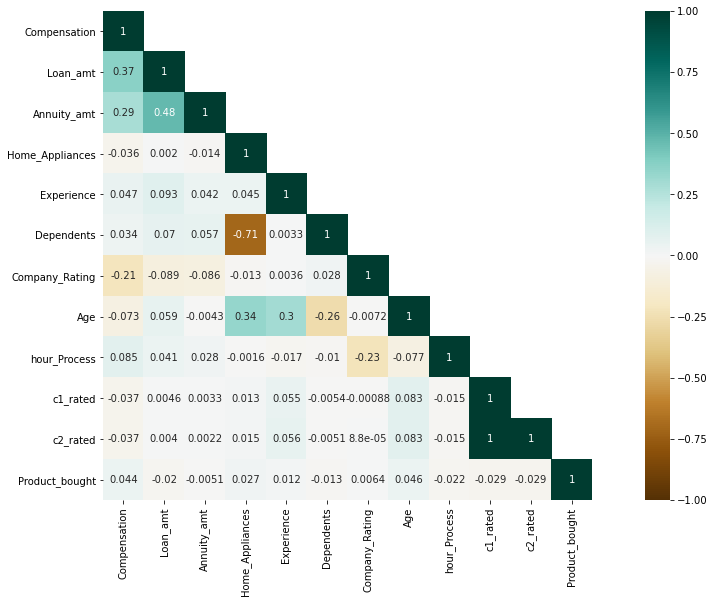

In [20]:
mask = np.triu(data_spear.corr(method='spearman'), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(data_spear.corr(method='spearman'), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

In [21]:
nulval = db.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
Compensation,6242,5.29
Vehicle_Status,9104,7.72
Loan_amt,0,0.00
Annuity_amt,4611,3.91
Job_Type,10248,8.69
Default_hist,0,0.00
Prop_List,1965,1.67
Home_Appliances,10964,9.30
Region_Type,0,0.00
Credit_Inq,2690,2.28


In [22]:
# Boxplot + Hist chart
def boxhist(x):
    variable = db[x]
    np.array(variable).mean()
    np.median(variable)
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
    mean=np.array(variable).mean()
    median=np.median(variable)
    
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    
    plt.title(x, fontsize=10, loc="right")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()

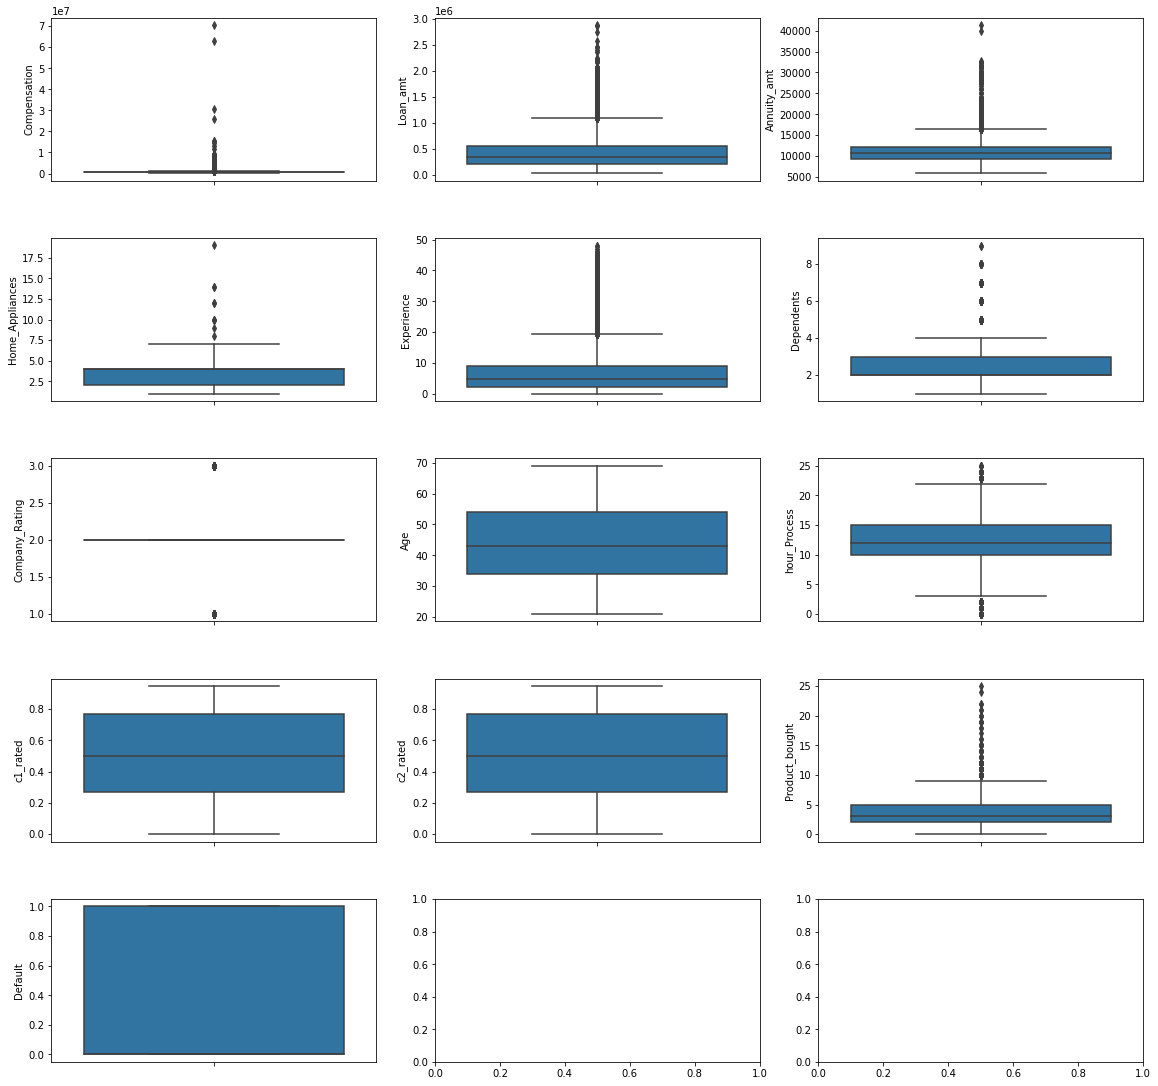

In [23]:
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(16, 15))
index = 0
axs = axs.flatten()
for k,v in data_nu.items():
    sns.boxplot(y=k, data=data_nu, ax=axs[index], orient="h")
    index += 1
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [24]:
display(db.describe().loc[["mean","50%","std"]].loc[:,["Compensation","Loan_amt","Annuity_amt"]])

,Compensation,Loan_amt,Annuity_amt
mean,745051.897431,414801.133722,10845.286442
50%,665996.000000,349542.500000,10773.820000
std,470276.230114,274678.779207,2061.529355


count    1.261980e+05
mean     7.450519e+05
std      4.702762e+05
min      1.527280e+05
25%      5.177060e+05
50%      6.659960e+05
75%      8.794890e+05
max      7.037702e+07
Name: Compensation, dtype: float64


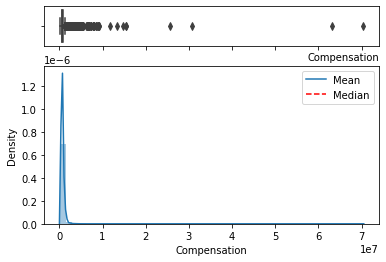

In [25]:
print(db.Compensation.describe())
boxhist("Compensation")

count    1.208820e+05
mean     6.935850e+05
std      2.458950e+05
min      1.527280e+05
25%      5.115958e+05
50%      6.516855e+05
75%      8.449200e+05
max      1.422160e+06
Name: Compensation, dtype: float64


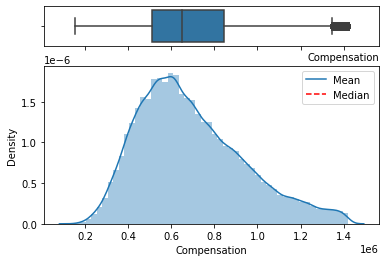

In [26]:
# Dealing with the outliers through IQR score method
Q1 = db['Compensation'].quantile(0.25)
Q3 = db['Compensation'].quantile(0.75)
IQR = Q3 - Q1
db['Compensation'] = db.Compensation[~((db.Compensation < (Q1 - 1.5 * IQR)) |(db.Compensation > (Q3 + 1.5 * IQR)))]

print(db.Compensation.describe())

boxhist("Compensation")

In [27]:
print(int(data_nu.Compensation.describe()[0]) - int(db.Compensation.describe()[0]),"outliers were removed with this operation.")

5316 outliers were removed with this operation.


count    1.324400e+05
mean     4.148011e+05
std      2.746788e+05
min      3.427500e+04
25%      2.045300e+05
50%      3.495425e+05
75%      5.582050e+05
max      2.872142e+06
Name: Loan_amt, dtype: float64


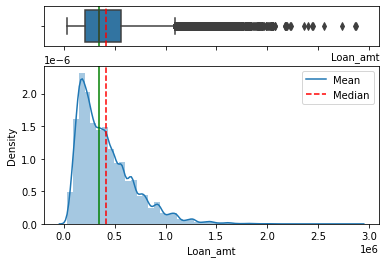

In [28]:
print(db.Loan_amt.describe())
boxhist("Loan_amt")

count    1.288370e+05
mean     3.900884e+05
std      2.321768e+05
min      3.427500e+04
25%      2.015394e+05
50%      3.418500e+05
75%      5.335040e+05
max      1.088701e+06
Name: Loan_amt, dtype: float64


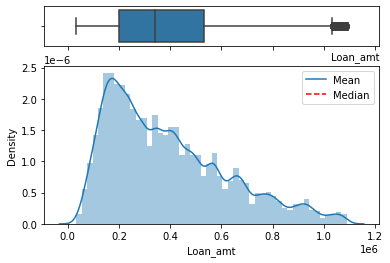

In [29]:
# Dealing with the outliers through IQR score method
Q1 = db['Loan_amt'].quantile(0.25)
Q3 = db['Loan_amt'].quantile(0.75)
IQR = Q3 - Q1
db['Loan_amt'] = db.Loan_amt[~((db.Loan_amt < (Q1 - 1.5 * IQR)) |(db.Loan_amt > (Q3 + 1.5 * IQR)))]

print(db.Loan_amt.describe())

boxhist("Loan_amt")

In [30]:
print(int(data_nu.Loan_amt.describe()[0]) - int(db.Loan_amt.describe()[0]),"outliers were removed with this operation.")

3603 outliers were removed with this operation.


count    127829.000000
mean      10845.286442
std        2061.529355
min        5852.100000
25%        9348.370000
50%       10773.820000
75%       12165.390000
max       41301.000000
Name: Annuity_amt, dtype: float64


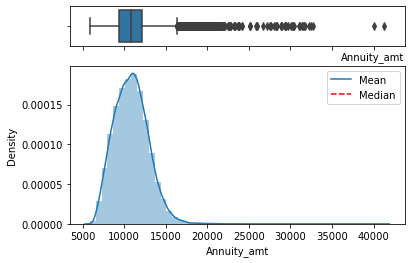

In [31]:
print(db.Annuity_amt.describe())
boxhist("Annuity_amt")

count    126815.000000
mean      10786.032942
std        1943.975109
min        5852.100000
25%        9335.365000
50%       10752.920000
75%       12127.775000
max       16390.210000
Name: Annuity_amt, dtype: float64


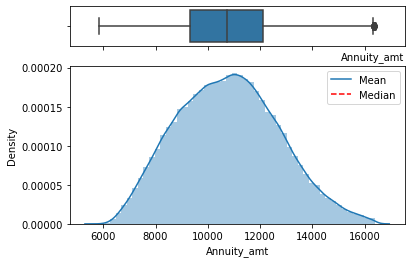

In [32]:
# Dealing with the outliers through IQR score method
Q1 = db['Annuity_amt'].quantile(0.25)
Q3 = db['Annuity_amt'].quantile(0.75)
IQR = Q3 - Q1
db['Annuity_amt'] = db.Annuity_amt[~((db.Annuity_amt < (Q1 - 1.5 * IQR)) |(db.Annuity_amt > (Q3 + 1.5 * IQR)))]

print(db.Annuity_amt.describe())

boxhist("Annuity_amt")

In [33]:
print(int(data_nu.Annuity_amt.describe()[0]) - int(db.Annuity_amt.describe()[0]),"outliers were removed with this operation.")

1014 outliers were removed with this operation.


In [34]:
for column in db.columns:
    if db[column].isna().sum() != 0:
        missing = db[column].isna().sum()
        portion = (missing / db.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ---> '{portion:.3f}%'")

'Compensation': number of missing values '11558' ---> '8.727%'
'Vehicle_Status': number of missing values '9104' ---> '6.874%'
'Loan_amt': number of missing values '3603' ---> '2.720%'
'Annuity_amt': number of missing values '5625' ---> '4.247%'
'Job_Type': number of missing values '10248' ---> '7.738%'
'Prop_List': number of missing values '1965' ---> '1.484%'
'Home_Appliances': number of missing values '10964' ---> '8.278%'
'Credit_Inq': number of missing values '2690' ---> '2.031%'
'Experience': number of missing values '21845' ---> '16.494%'
'Income_Alt': number of missing values '7682' ---> '5.800%'
'Company_Rating': number of missing values '11731' ---> '8.858%'
'c1_rated': number of missing values '17513' ---> '13.223%'
'c2_rated': number of missing values '13321' ---> '10.058%'


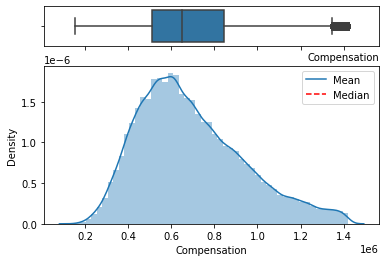

In [36]:
db.Compensation.value_counts(dropna=False)
boxhist("Compensation")

In [37]:
db["Compensation"] = db.Compensation.fillna(db.Compensation.mean())
print(f"Fillna done. Anomalies detected: {db.Compensation.isnull().values.any()}")

Fillna done. Anomalies detected: False


In [38]:
db.Vehicle_Status.value_counts(dropna=False)

N      81370
Y      41966
NaN     9104
Name: Vehicle_Status, dtype: int64

In [40]:
db["Vehicle_Status"] = db.Vehicle_Status.fillna(db.Vehicle_Status.value_counts().index[0])
print(f"Imputation done. Missing values: {db.Vehicle_Status.isnull().sum()}")

Imputation done. Missing values: 0


## 3 Model Building

In this you can build various ML models and try tuning the parameters involved to achieve better score

## Model 1

## Model 2 

## Model 3

## Descriptive Section

### Q) Once you have a mechanism to estimate the “level of default”, please describe how the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for. 
##### (This is an open-ended question and you are free to come up with a detailed explanation basis the analysis, model building exercise you have carried out)